<a href="https://colab.research.google.com/github/AnushiyaG14/CNC_Timeseries/blob/main/CNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import glob

# Set the path to the directory containing the experiment CSVs
data_path = "/content/CNC"  # Change this to your actual path

# Get all CSV files matching the pattern
csv_files = glob.glob(os.path.join(data_path, "experiment_*.csv"))

# List to store individual DataFrames
df_list = []

# Read and append all CSVs
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(df_list, ignore_index=True)

# Display shape of merged dataset
print("Merged DataFrame Shape:", merged_df.shape)

# Save the merged dataset (optional)
merged_df.to_csv("merged_experiments.csv", index=False)


<ipython-input-1-97e7ce9ecb85>:16: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Merged DataFrame Shape: (393902, 55)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import glob
file_paths= "/content/CNC"
# Load all experiment files
file_paths = glob.glob(file_paths + "/experiment_*.csv")

dataframes = []
for idx, file in enumerate(file_paths, start=1):  # Experiment 1 to 18
    df = pd.read_csv(file)
    df["No"] = idx  # Assign experiment number
    dataframes.append(df)

# Concatenate all experiments into one DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

print(merged_df.head())  # Check if 'No' column is added


In [ ]:
merged_df.isnull().sum()

NameError: name 'merged_df' is not defined

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [ ]:
merged_df['Machining_Process'].unique()

array(['Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'End',
       'Starting', 'end'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
merged_df["Machining_Process"]=encoder.fit_transform(merged_df[["Machining_Process"]])

In [ ]:
merged_df.duplicated().sum()

331

In [ ]:
merged_df.drop_duplicates(inplace=True)

In [ ]:
train = pd.read_csv("/content/CNC/train.csv")

In [ ]:
train.isnull().sum()

,0
No,0
material,0
feedrate,0
clamp_pressure,0
tool_condition,0
machining_finalized,0
passed_visual_inspection,4


In [ ]:
train.duplicated().sum()

0

In [ ]:
train["material"]=train["material"].map({"wax":1})

In [ ]:
train["tool_condition"]=train["tool_condition"].map({"worn":1,"unworn":0})

In [ ]:
train["machining_finalized"]=train["machining_finalized"].map({"yes":1,"no":0})

In [ ]:
train['passed_visual_inspection']=train['passed_visual_inspection'].map({'yes':1,'no':0})
train["passed_visual_inspection"] = train["passed_visual_inspection"].fillna(0)


In [ ]:
# Check for duplicates in train.csv
print("Duplicates in train.csv:", train["No"].duplicated().sum())

# Check for duplicates in merged_df
print("Duplicates in merged_df:", merged_df["No"].duplicated().sum())


Duplicates in train.csv: 0
Duplicates in merged_df: 24937


In [ ]:
final= pd.merge(train,merged_df, on=["No"], how="left")

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955 entries, 0 to 24954
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No                         24955 non-null  int64  
 1   material                   24955 non-null  int64  
 2   feedrate                   24955 non-null  int64  
 3   clamp_pressure             24955 non-null  float64
 4   tool_condition             24955 non-null  int64  
 5   machining_finalized        24955 non-null  int64  
 6   passed_visual_inspection   24955 non-null  float64
 7   X1_ActualPosition          24955 non-null  float64
 8   X1_ActualVelocity          24955 non-null  float64
 9   X1_ActualAcceleration      24955 non-null  float64
 10  X1_CommandPosition         24955 non-null  float64
 11  X1_CommandVelocity         24955 non-null  float64
 12  X1_CommandAcceleration     24955 non-null  float64
 13  X1_CurrentFeedback         24955 non-null  flo

In [ ]:
final.shape

(24955, 55)

In [ ]:
for i in final.columns:
  print(i,final[i].skew(), final[i].kurtosis())

No -0.14376381367274238 -1.3003850759827926
material 0.0 0.0
feedrate 0.7455280176063368 -1.2131081267849468
clamp_pressure -0.05209529660707268 -1.6831914498338276
tool_condition -0.36508189729701856 -1.8668648331898048
machining_finalized -0.8824225846559489 -1.2214282789779438
passed_visual_inspection -0.19154704227912103 -1.9634670976349065
X1_ActualPosition 1.2821570904240798 0.28776147805801777
X1_ActualVelocity 1.718315273508073 20.772066668527188
X1_ActualAcceleration 0.9072534779308007 69.01386387440772
X1_CommandPosition 1.2822035324622918 0.28781035244377673
X1_CommandVelocity 1.7061743626143782 20.50367596548997
X1_CommandAcceleration -0.027612776909261325 141.60543039937411
X1_CurrentFeedback 0.2684032531368642 0.17844330045274992
X1_DCBusVoltage 0.8411722222501332 4.61951517881738
X1_OutputCurrent -0.04302745939402987 0.9017618077929548
X1_OutputVoltage 2.8508341132830366 14.462238633001187
X1_OutputPower 7.55301113731304 87.36689685320707
Y1_ActualPosition 1.260479964119

✔ Feedrate
✔ Clamp Pressure
✔ M1_CURRENT_FEEDRATE
✔ X1_ActualPosition, Y1_ActualPosition, Z1_ActualPosition
✔ X1_CurrentFeedback, Y1_CurrentFeedback
✔ X1_DCBusVoltage
✔ X1_OutputPower (after transformation), Y1_OutputPower
✔ S1_OutputPower

In [ ]:
from scipy import stats
method = [0,0.5,-0.5,1,-1,2,-2]
for i in method:
  print (i)
  print("x1_skewness",pd.DataFrame(stats.boxcox(final['X1_OutputPower'],lmbda=i)).skew().values,"x1_kurtosis",pd.DataFrame(stats.boxcox(final['X1_OutputPower'],lmbda=i)).kurtosis().values)
  print("-------------------------------------")
  print("y1_skewness",pd.DataFrame(stats.boxcox(final['Y1_OutputPower'],lmbda=i)).skew().values,"y1_kurtosis",pd.DataFrame(stats.boxcox(final['Y1_OutputPower'],lmbda=i)).kurtosis().values)

0
x1_skewness [nan] x1_kurtosis [nan]
-------------------------------------
y1_skewness [2.34551727] y1_kurtosis [7.02791196]
0.5
x1_skewness [1.98260474] x1_kurtosis [7.15684619]
-------------------------------------
y1_skewness [2.37477509] y1_kurtosis [7.21238656]
-0.5
x1_skewness [nan] x1_kurtosis [nan]
-------------------------------------
y1_skewness [2.31657501] y1_kurtosis [6.8475407]
1
x1_skewness [7.03077593] x1_kurtosis [74.44991297]
-------------------------------------
y1_skewness [2.40435156] y1_kurtosis [7.40108132]
-1
x1_skewness [nan] x1_kurtosis [nan]
-------------------------------------
y1_skewness [2.2879453] y1_kurtosis [6.67116065]
2
x1_skewness [20.81337311] x1_kurtosis [673.14917687]
-------------------------------------
y1_skewness [2.46447348] y1_kurtosis [7.79162328]
-2
x1_skewness [nan] x1_kurtosis [nan]
-------------------------------------
y1_skewness [2.23161204] y1_kurtosis [6.32994744]


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [ ]:
import numpy as np
final['Y1_OutputPower'] = np.sqrt(final['Y1_OutputPower']+1)
print("skew",final['Y1_OutputPower'].skew(),"kurtosis",final['Y1_OutputPower'].kurtosis())

skew 6.049984210927311 kurtosis 46.511534711431274


In [ ]:
from scipy.stats import boxcox
final['Y1_OutputPower'], best_lambda = boxcox(final['Y1_OutputPower']+1)

/usr/local/lib/python3.11/dist-packages/scipy/special/_logsumexp.py:116: RuntimeWarning: invalid value encountered in exp
  tmp = np.exp(a - a_max)


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [ ]:
final['Y1_OutputPower'], best_lambda = boxcox('Y1_OutputPower'+1)

TypeError: can only concatenate str (not "int") to str

In [ ]:
final['Y1_OutputPower_log'] = np.log1p(final['Y1_OutputPower'])
print("skew",final['Y1_OutputPower_log'].skew(),"kurtosis",final['Y1_OutputPower_log'].kurtosis())

skew 6.049154753055079 kurtosis 46.494334163583034


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
final['Y1_OutputPower_transformed'] = pt.fit_transform(final[['Y1_OutputPower']])

In [ ]:
print("skew",final['Y1_OutputPower_transformed'].skew(),"kurtosis",final['Y1_OutputPower_transformed'].kurtosis())

skew 0.0 kurtosis 0.0


In [ ]:
final.columns

Index(['No', 'material_x', 'feedrate_x', 'clamp_pressure_x',
       'tool_condition_x', 'machining_finalized_x',
       'passed_visual_inspection_x', 'X1_ActualPosition', 'X1_ActualVelocity',
       'X1_ActualAcceleration', 'X1_CommandPosition', 'X1_CommandVelocity',
       'X1_CommandAcceleration', 'X1_CurrentFeedback', 'X1_DCBusVoltage',
       'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower',
       'Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration',
       'Y1_CommandPosition', 'Y1_CommandVelocity', 'Y1_CommandAcceleration',
       'Y1_CurrentFeedback', 'Y1_DCBusVoltage', 'Y1_OutputCurrent',
       'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition',
       'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandPosition',
       'Z1_CommandVelocity', 'Z1_CommandAcceleration', 'Z1_CurrentFeedback',
       'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage',
       'S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration',
       'S1_Comma

In [ ]:
['']

In [ ]:
for j in final.columns:
  if final[j].skew() < 0.5 and final[j].skew() > -0.5 and final[j].kurtosis() < 3 and final[j].kurtosis() > -3 :
    continue
  print(j) #34 columns

feedrate
machining_finalized
X1_ActualPosition
X1_ActualVelocity
X1_ActualAcceleration
X1_CommandPosition
X1_CommandVelocity
X1_CommandAcceleration
X1_DCBusVoltage
X1_OutputVoltage
X1_OutputPower
Y1_ActualPosition
Y1_ActualVelocity
Y1_ActualAcceleration
Y1_CommandPosition
Y1_CommandVelocity
Y1_CommandAcceleration
Y1_DCBusVoltage
Y1_OutputCurrent
Y1_OutputVoltage
Y1_OutputPower
Z1_ActualPosition
Z1_ActualVelocity
Z1_ActualAcceleration
Z1_CommandPosition
Z1_CommandVelocity
Z1_CommandAcceleration
S1_ActualVelocity
S1_CommandVelocity
S1_CommandAcceleration
S1_OutputVoltage
S1_OutputPower
M1_CURRENT_PROGRAM_NUMBER
M1_CURRENT_FEEDRATE


In [ ]:
final.corr()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
No,1.000000,NaN,-0.386258,-0.205175,0.561837,0.397224,0.437399,-0.163375,-0.003235,-0.010913,...,0.125508,0.122755,-0.138272,0.119697,0.126346,NaN,-0.026073,0.073125,-0.128549,0.014203
material,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feedrate,-0.386258,NaN,1.000000,0.230237,0.039368,-0.435356,-0.710608,0.011338,-0.010024,-0.018689,...,-0.006696,-0.006515,0.029832,-0.007869,-0.007928,NaN,-0.007178,-0.000887,-0.008468,0.006916
clamp_pressure,-0.205175,NaN,0.230237,1.000000,0.322821,0.465765,-0.083489,0.083849,-0.016136,-0.011533,...,-0.036579,-0.031694,-0.000328,-0.044445,-0.031895,NaN,0.013744,-0.019531,0.093580,0.032404
tool_condition,0.561837,NaN,0.039368,0.322821,1.000000,0.405722,-0.068051,-0.196007,-0.011152,-0.026786,...,0.208334,0.211071,-0.147670,0.216791,0.219091,NaN,-0.017585,0.155632,-0.216624,0.056489
machining_finalized,0.397224,NaN,-0.435356,0.465765,0.405722,1.000000,0.569408,0.123091,0.000917,0.006098,...,-0.096886,-0.101094,0.076286,-0.121167,-0.104025,NaN,0.007893,-0.089390,0.111201,-0.020923
passed_visual_inspection,0.437399,NaN,-0.710608,-0.083489,-0.068051,0.569408,1.000000,0.196819,0.007285,0.023109,...,-0.164537,-0.167155,0.097486,-0.189640,-0.172688,NaN,0.013861,-0.141052,0.205930,-0.055969
X1_ActualPosition,-0.163375,NaN,0.011338,0.083849,-0.196007,0.123091,0.196819,1.000000,-0.030053,-0.016814,...,-0.577975,-0.598112,0.512447,-0.629547,-0.610792,NaN,0.026685,-0.394320,0.429674,-0.054678
X1_ActualVelocity,-0.003235,NaN,-0.010024,-0.016136,-0.011152,0.000917,0.007285,-0.030053,1.000000,0.042901,...,0.042997,0.042842,-0.037518,0.063939,0.050762,NaN,0.003124,0.021629,-0.022434,-0.000874
X1_ActualAcceleration,-0.010913,NaN,-0.018689,-0.011533,-0.026786,0.006098,0.023109,-0.016814,0.042901,1.000000,...,-0.006417,-0.007875,0.003117,-0.006756,-0.002593,NaN,0.001907,-0.007081,0.015395,-0.011268


In [ ]:
#hypothesis test
continues=[[col for col in final.columns if col not in ["No"] + [["tool_condition", "machining_finalized", "passed_visual_inspection"]]]]
categories=[["tool_condition", "machining_finalized", "passed_visual_inspection"]]
from scipy import stats

def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.055:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

#defining function for categories vs categories
def chisqare_cat_vs_cat(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.055 else False

def annova_test(d1,d2):
  group=final[d2].unique()
  data={}
  for i in group:
    data[i]=final[d1][final[d2]==i]
  f_value,p_value=stats.f_oneway(*[i for i in data.values()])
  if p_value < 0.055:
    return False
  else:
    return True

newfinal={}
for i in final.columns:
  newfinal[i]={}
  for j in final.columns:
    if (i in continues) and (j in continues):
      result=two_sample(final[i],final[j])
    elif  (i in continues) and (j in categories):
      result=annova_test(i,j)
    elif (i in categories) and (j in continues):
      result=annova_test(j,i)
    elif (i in categories) and (j in categories):
      result=chisqare_cat_vs_cat(final[i],final[j])
    if result:
      newfinal[i][j]=1
    else:
      newfinal[i][j]=0

In [ ]:
sample=pd.DataFrame(newfinal)
sample

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
No,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
material,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
feedrate,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
clamp_pressure,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
tool_condition,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
machining_finalized,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
passed_visual_inspection,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1_ActualPosition,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1_ActualVelocity,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1_ActualAcceleration,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<Axes: >

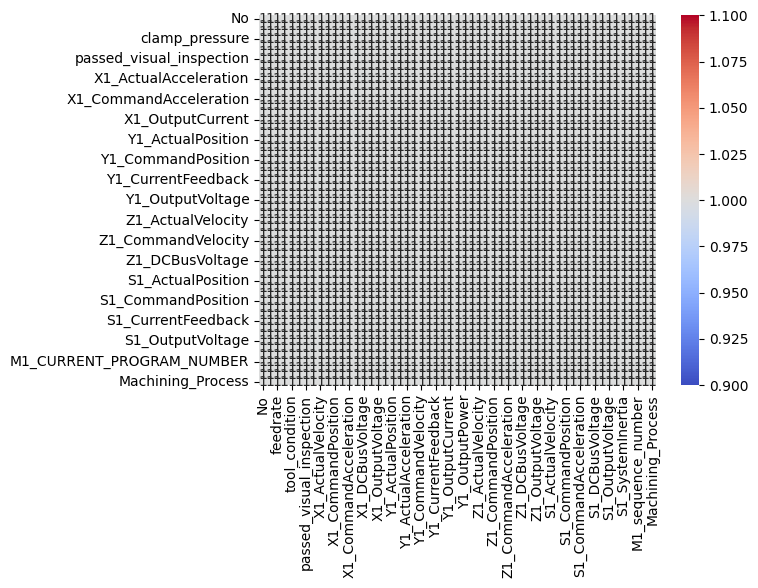

In [ ]:
import seaborn as sns
sns.heatmap(sample,cmap="coolwarm",annot=True)

In [ ]:
print(final.columns)

Index(['No', 'material', 'feedrate', 'clamp_pressure', 'tool_condition',
       'machining_finalized', 'passed_visual_inspection', 'X1_ActualPosition',
       'X1_ActualVelocity', 'X1_ActualAcceleration', 'X1_CommandPosition',
       'X1_CommandVelocity', 'X1_CommandAcceleration', 'X1_CurrentFeedback',
       'X1_DCBusVoltage', 'X1_OutputCurrent', 'X1_OutputVoltage',
       'X1_OutputPower', 'Y1_ActualPosition', 'Y1_ActualVelocity',
       'Y1_ActualAcceleration', 'Y1_CommandPosition', 'Y1_CommandVelocity',
       'Y1_CommandAcceleration', 'Y1_CurrentFeedback', 'Y1_DCBusVoltage',
       'Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_OutputPower',
       'Z1_ActualPosition', 'Z1_ActualVelocity', 'Z1_ActualAcceleration',
       'Z1_CommandPosition', 'Z1_CommandVelocity', 'Z1_CommandAcceleration',
       'Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent',
       'Z1_OutputVoltage', 'S1_ActualPosition', 'S1_ActualVelocity',
       'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_Co

In [ ]:
target_columns = ["tool_condition", "machining_finalized", "passed_visual_inspection"] #y

In [ ]:
#feature_columns = [col for col in final.columns if col not in ["No"] + target_columns] #x

In [ ]:
 feature_columns = [["feedrate", "clamp_pressure", "material",
    "M1_CURRENT_FEEDRATE", "X1_ActualPosition", "Y1_ActualPosition",
    "Z1_ActualPosition", "X1_CurrentFeedback", "Y1_CurrentFeedback",
    "X1_DCBusVoltage", "X1_OutputPower", "Y1_OutputPower_transformed",
    "S1_OutputPower"]]

In [ ]:
X = final[feature_columns]
y = final[target_columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
y_train.shape

(19964, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
#Hidden layers
model.add(Dense(128,input_dim=X_train_scaler.shape[1],activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(82,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(36,activation="relu"))
#output layer
model.add(Dense(3,activation="sigmoid"))
#compile model
model.compile(loss = "binary_crossentropy",optimizer="adam", metrics = ["accuracy",tf.keras.metrics.F1Score(),tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 82)                  │           8,282 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           5,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 36)                  │           2,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             111 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,601 (139.07 KB)

 Trainable params: 35,601 (139.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = model.fit(X_train,y_train, epochs=30, validation_split=0.2)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4235 - f1_score: 0.4490 - loss: 1.8527 - precision: 0.6882 - recall: 0.7332 - val_accuracy: 0.6148 - val_f1_score: 0.4609 - val_loss: 0.5891 - val_precision: 0.7498 - val_recall: 0.8590
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4424 - f1_score: 0.4832 - loss: 0.5578 - precision: 0.7504 - recall: 0.8556 - val_accuracy: 0.5192 - val_f1_score: 0.5191 - val_loss: 0.4759 - val_precision: 0.7698 - val_recall: 0.9326
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4286 - f1_score: 0.5067 - loss: 0.4747 - precision: 0.7761 - recall: 0.8893 - val_accuracy: 0.5172 - val_f1_score: 0.5331 - val_loss: 0.5118 - val_precision: 0.8146 - val_recall: 0.7999
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4407 - f1_score: 0.5176 - loss: 0.4531 - precision: 0.7903 - recall: 0.8929 - val_accuracy: 0.4082 - val_f1_score: 0.5340 - val_loss: 0.4219 - val_precision: 0.7981 - val_recall:

In [ ]:
# Save model
model.save("cnc_fault_prediction_model.h5")
from tensorflow import keras
# Load model
loaded_model = keras.models.load_model("cnc_fault_prediction_model.h5")